 ***MAGPANTAY, NINO JANDEL C.***

 ***BSCS-3B***

 ***MR. BERNARDINO***


# **1. Import Necessary Libraries**


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# **2. Load the Dataset**

In [2]:
df = pd.read_csv('titanic_data.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# **3. Select Features and Target Variable**

In [3]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# **4. Preprocess the Data**

In [4]:
# Separating X and y
X = df[features]
y = df[target]

# Handling missing values and encoding categorical variables
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# **5. Split the Data into Training and Test Sets**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **6. Create and Train the Logistic Regression Model**

In [6]:
# Creating the logistic regression pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fitting the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression())])

# **7. Make Predictions and Evaluate the Model**

In [7]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

Accuracy: 0.7988826815642458
Confusion Matrix: 
[[90 15]
 [21 53]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



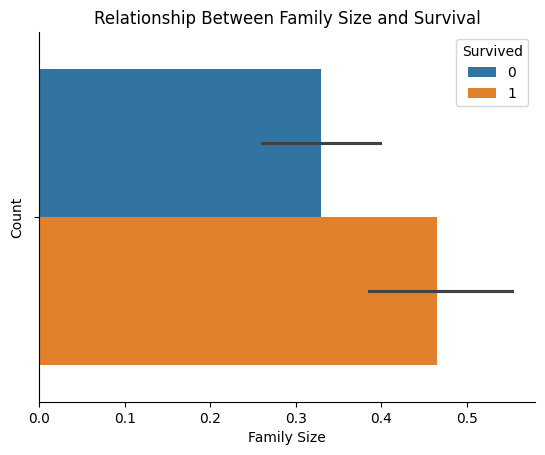

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Assuming your DataFrame is named 'full' and contains the columns 'Fsize' and 'Survived'
#Select the first 891 rows (adjust if needed)
df = df.iloc[:891, :]

#Create the visualization using seaborn
sns.barplot(x="Parch", hue="Survived", data=df)

#Customize the plot (optional)
sns.despine()  # Remove extra grid lines
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.title("Relationship Between Family Size and Survival")
plt.show()

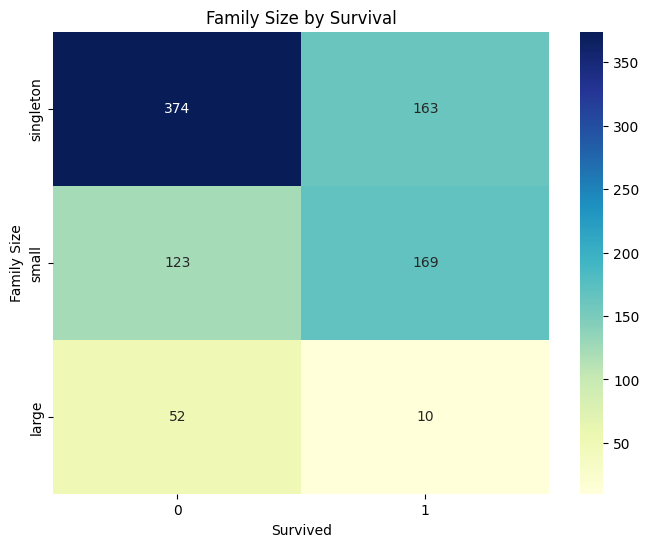

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Fsize'] = df['SibSp'] + df['Parch'] + 1
df['FsizeD'] = pd.cut(df['Fsize'], bins=[0, 1, 4, float('inf')], labels=['singleton', 'small', 'large'])

table = pd.crosstab(df['FsizeD'], df['Survived'])

plt.figure(figsize=(8, 6))
plt.title('Family Size by Survival')
sns.heatmap(table, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.show()